In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import pearsonr

# The safety of the Chicago streets

## Introduction
Crime is an escalating problem for the city of Chicago. The amount of violent crime incidents has surged by 11% and the amount of arrests has dropped compared to the previous year (Illinois Policy, 2024). This alarming trend has resulted in the highest amount of crime since the start of the new decade. Understanding the impact of crime extends beyond just recognizing its immediate effects on victims. It also affects various aspects of urban life to a certain extent. We want to know how far that certain extent goes and to make that analysis we thought of 2 perspectives.
	Perspective 1: Chicago is known for the extreme amount of crime that occurs there, which directly correlates to the amount of traffic accidents that happen there. Therefore the amount of crimes need to be reduced so that the citizens of Chicago can live peaceful lives.
	Perspective 2: The amount of Crime that occurs in Chicago is extreme but it has no direct correlation to the amount of traffic accidents that happen there. It is therefore not necessary to address the amount of crime immediately since no citizens are in harm's way.
With this project we want to shed some light on the factors at play and create a realistic picture of what is happening.





## Dataset and Preprocessing

We will analyze data from the Chicago Police Department's CLEAR database which contains the crime data. It is a dataset containing data from 2001-2017. It contains more than 6,000,000 rows of data but not all of it will be used. The reason is that we will use another dataset from the same police department that contain the records of traffic accidents from 2013-2023 and has almost 800.000 rows of data. The datasets do not span the same timeline so to make the data more relevant we will only use the overlapping years. Therefore all the data will be filtered to be only in between 2013-2017.
Furthermore, many rows are missing a collumn which means that the data needs to be filtered to what we will use. For example, some rows have the location but not the lightning condition, the data will still be used for the location visualization but not for the lightning condition visualization. This flitering will be done with every visualization so we wont miss any useful datapoints.


In [6]:
# import data
crime_data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

crash_data = pd.read_csv('Traffic_Crashes_Crashes.csv')


In [21]:
# clean data
crash_data['CRASH_DATE'] = pd.to_datetime(crash_data['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

crime_data = crime_data[(crime_data['Date'].dt.year >= 2012) & (crime_data['Date'].dt.year <= 2017)]
crash_data = crash_data[(crash_data['CRASH_DATE'].dt.year >= 2012) & (crash_data['CRASH_DATE'].dt.year <= 2017)]



In [22]:

def get_variable_types(data):
    # Get the data types of all variables
    variable_types = data.dtypes

    return variable_types

get_variable_types(crash_data)

CRASH_RECORD_ID                          object
CRASH_DATE_EST_I                         object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
LANE_CNT                                float64
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
REPORT_TYPE                              object
CRASH_TYPE                               object
INTERSECTION_RELATED_I                   object
NOT_RIGHT_OF_WAY_I                       object
HIT_AND_RUN_I                            object
DAMAGE                                   object
DATE_POLICE_NOTIFIED                    

In [23]:
def calculate_mean_coordinates(crash_data):
    # Calculate the mean longitude and latitude
    mean_longitude = crash_data['LONGITUDE'].mean()
    mean_latitude = crash_data['LATITUDE'].mean()

    return {
        'mean_longitude': mean_longitude,
        'mean_latitude': mean_latitude
    }

calculate_mean_coordinates(crash_data)

{'mean_longitude': -87.66825161941586, 'mean_latitude': 41.85544932323923}

In [24]:
def show_head_hit_and_run(crash_data, n=5):
    # Return the first n rows of the 'HIT_AND_RUN_I' column
    return crash_data['HIT_AND_RUN_I'].head(n)

show_head_hit_and_run(crash_data)

553      Y
557    NaN
595      Y
600    NaN
608      Y
Name: HIT_AND_RUN_I, dtype: object

In [25]:
def analyze_hit_and_run(crash_data):
    # Count the number of True and False values
    count_true = crash_data[crash_data['HIT_AND_RUN_I'] == 'Y'].shape[0]

    # Calculate the percentages
    total_count = crash_data.shape[0]
    percent_true = (count_true / total_count) * 100

    return {
        'count_true': count_true,
        'percent_true': percent_true
    }

analyze_hit_and_run(crash_data)

{'count_true': 35927, 'percent_true': 26.156500720765326}

In [26]:
def count_daylight(crash_data):
    # Count the number of 'DAYLIGHT' instances
    count_daylight = crash_data[crash_data['LIGHTING_CONDITION'] == 'DAYLIGHT'].shape[0]

    # Calculate the percentage
    total_count = crash_data.shape[0]
    percent_daylight = (count_daylight / total_count) * 100

    return {
        'count_daylight': count_daylight,
        'percent_daylight': percent_daylight
    }

count_daylight(crash_data)

{'count_daylight': 90326, 'percent_daylight': 65.76146308079852}

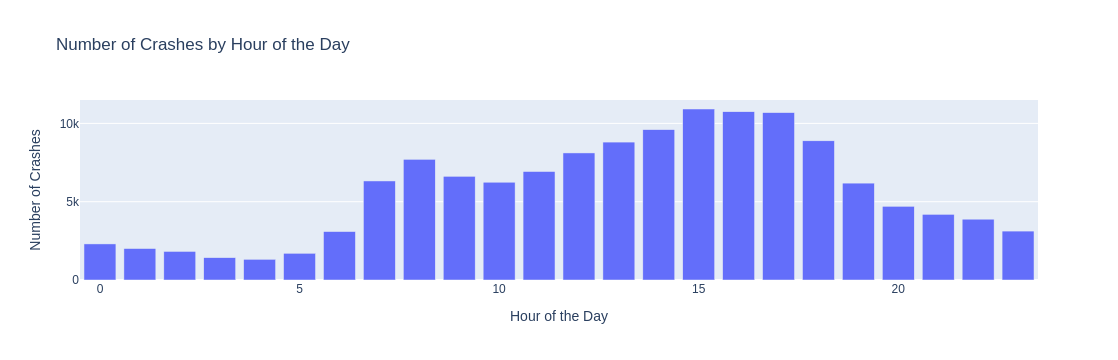

In [27]:
# Extract hour from 'CRASH_DATE'
crash_data.dropna(subset=['CRASH_DATE'], inplace=True)
crash_data['HOUR'] = crash_data['CRASH_DATE'].dt.hour

# Count the number of crashes per hour
crash_counts_per_hour = crash_data['HOUR'].value_counts().sort_index()

# Create a bar plot for crashes by hour
fig_hour = px.bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crashes'}, title='Number of Crashes by Hour of the Day')

fig_hour.show()

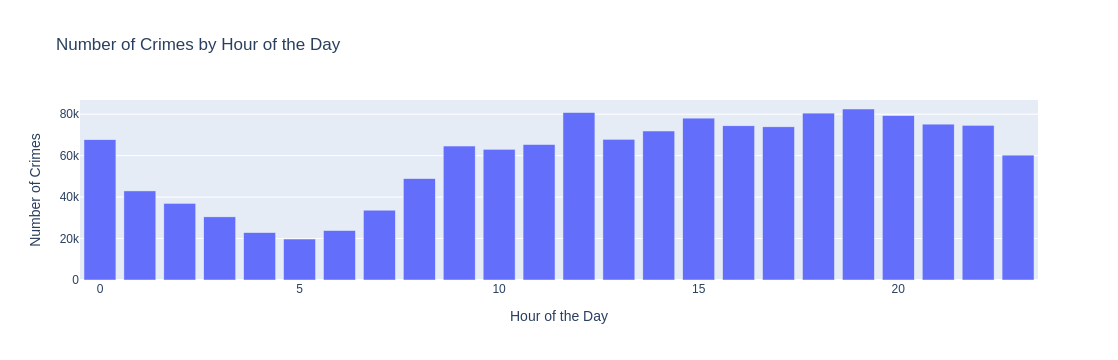

In [28]:
# Assuming crime_data is already loaded and contains a 'Date' column with dates in the format "mm/dd/yyyy hh:mm:ss AM/PM"

# Convert 'Date' to datetime with explicit format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour from 'Date'
crime_data['HOUR'] = crime_data['Date'].dt.hour

# Count the number of crimes per hour
crime_counts_per_hour = crime_data['HOUR'].value_counts().sort_index()

# Create a bar plot for crimes by hour
fig_crime_hour = px.bar(x=crime_counts_per_hour.index, y=crime_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crimes'}, title='Number of Crimes by Hour of the Day')

fig_crime_hour.show()

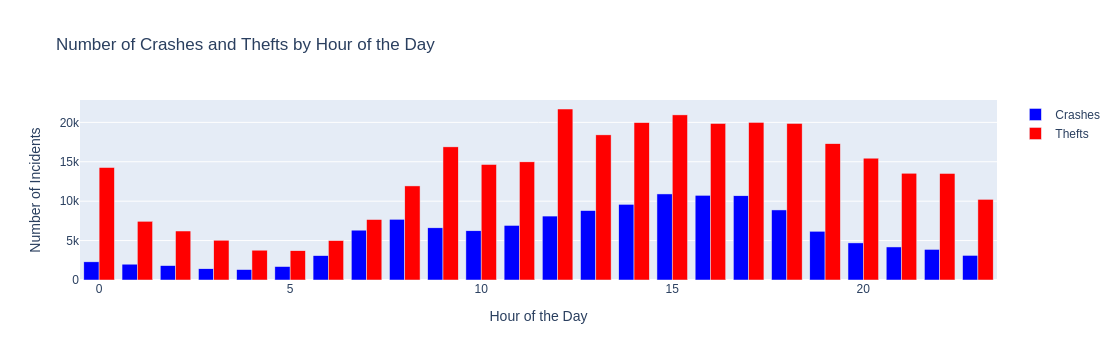

In [31]:
# Filter crime_data for rows where 'Primary Type' is 'THEFT'
theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']

# Count the number of thefts per hour
theft_counts_per_hour = theft_data['HOUR'].value_counts().sort_index()

# Assuming crash_counts_per_hour is already calculated

# Create traces for the plot
trace_crashes = go.Bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, name='Crashes', marker_color='blue')
trace_thefts = go.Bar(x=theft_counts_per_hour.index, y=theft_counts_per_hour.values, name='Thefts', marker_color='red')

# Create a figure and add traces
fig = go.Figure(data=[trace_crashes, trace_thefts])

# Update layout for a clear visualization
fig.update_layout(barmode='group', title='Number of Crashes and Thefts by Hour of the Day', xaxis_title='Hour of the Day', yaxis_title='Number of Incidents')

fig.show()

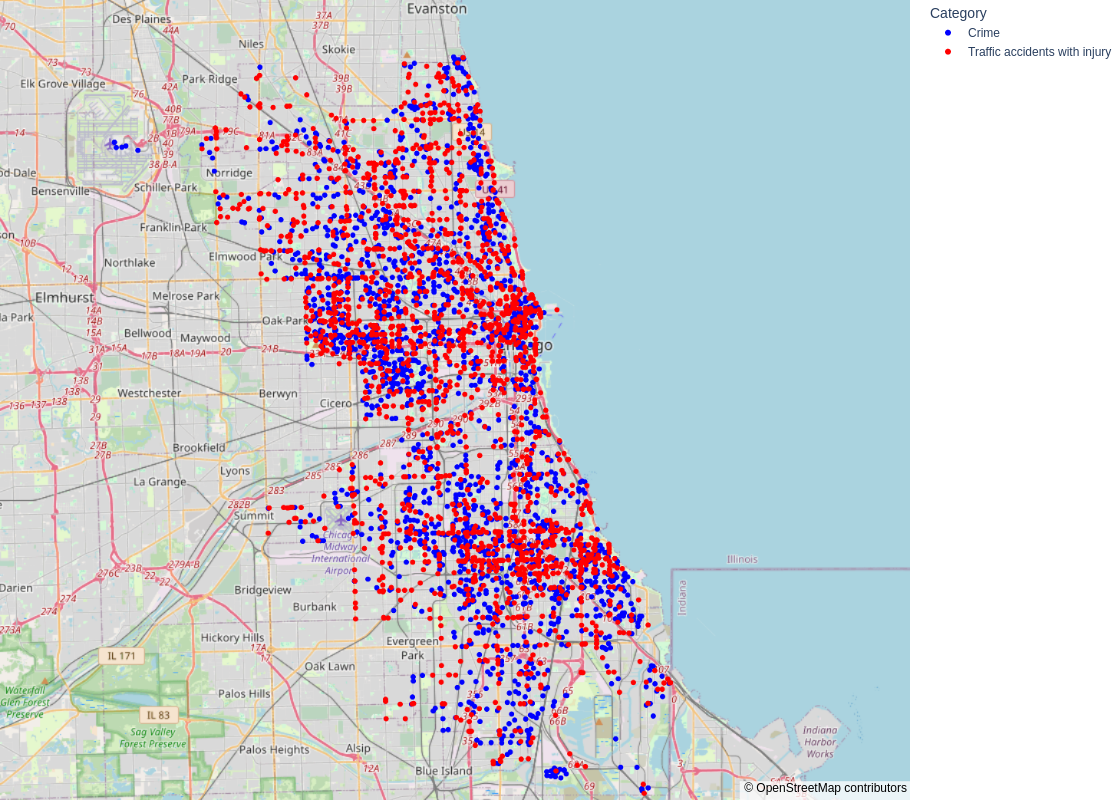

In [32]:
df_crimes = crime_data
df_crashes = crash_data

df_crimes.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df_crashes.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)

df_crashes = df_crashes[df_crashes['CRASH_TYPE'].str.contains('INJURY AND / OR TOW DUE TO CRASH', na=False)]
df_crimes_arrests = df_crimes[df_crimes['Arrest'] == True]

crime_count = df_crimes.shape[0]
crash_count = df_crashes.shape[0]

# Limit data to a smaller sample for performance
df_crimes = df_crimes.sample(n=2000, random_state=1)
df_crashes = df_crashes.sample(n=2000, random_state=1)

# Create a combined dataframe
df_combined = pd.DataFrame({
    'Latitude': pd.concat([df_crimes['Latitude'], df_crashes['LATITUDE']]),
    'Longitude': pd.concat([df_crimes['Longitude'], df_crashes['LONGITUDE']]),
    'Category': ['Crime'] * len(df_crimes) + ['Traffic accidents with injury'] * len(df_crashes)
})

# Define color scale
color_scale = {
    'Crime': 'blue',
    'Traffic accidents with injury': 'red'
}

# Plot the data
fig = px.scatter_mapbox(df_combined, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Category",
                        color_discrete_map=color_scale,
                        zoom=10, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

The blue dots on the map of Chicago represent the places where a crime has occurred and the red dots are the places where a traffic accident occurred where someone got injured.

We wanted to visualize where all the crimes and traffic accidents with injuries happened since we suspect that those accidents are more often crime related. Therefore we wanted to plot the crimes on an interactive open street map if there is a correlation that is obvious for the eye.

From this visualization alone you can see that the dots on the map are most of the time clusters of dots and especially in the middle of the map you can see a horizontal line where almost no crime or traffic accidents happen. Since the dots are more clustered together, we can assume that there is some sort of correlation but what exactly is not expressively visible. 
